In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # устанавливаем seaborn как по-умолчанию для отрисовки графиков

from sklearn.model_selection import train_test_split

In [193]:
X = pd.read_csv('Data/new_date_riverV1.csv',parse_dates=["date"])
X = X.drop(['Unnamed: 0'],axis=1)

In [194]:
X = X.drop(['w_forecast_d2','w_forecast_d3','w_forecast_d4','w_forecast_d5',
           'w_forecast_d6','w_forecast_d7','w_forecast_d8','w_forecast_d9',
            'w_forecast_d10','w_forecast_d11','w_forecast_d12','w_forecast_d13','w_forecast_d14'
           ], axis=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4384 entries, 0 to 4383
Data columns (total 28 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             4384 non-null   datetime64[ns]
 1   snow_height      4384 non-null   int64         
 2   degree_coverage  4384 non-null   int64         
 3   tmean            4384 non-null   float64       
 4   post_9387        4384 non-null   int64         
 5   pasday1          4384 non-null   float64       
 6   pasday2          4384 non-null   float64       
 7   pasday3          4384 non-null   float64       
 8   pasday4          4384 non-null   float64       
 9   pasday5          4384 non-null   float64       
 10  pasday6          4384 non-null   float64       
 11  pasday7          4384 non-null   float64       
 12  pasday8          4384 non-null   float64       
 13  pasday9          4384 non-null   float64       
 14  pasday10         4384 non-null   float64

In [195]:
#corr_matrix = X.corr()
#mask_matrix = np.tril(corr_matrix)

#plt.figure(figsize=(20,15))
#sns.heatmap(corr_matrix,center=0,vmin=-1 ,vmax=1, square=True, 
#            annot=True,fmt='.1g',linewidths=0.5, linecolor='white',mask=mask_matrix)

In [196]:
#plt.figure(figsize=(10,8))
#ax = sns.lineplot(x = X['day_of_year'], y=X['post_9387'], color='blue')
#plt.show()


In [197]:
X.corrwith(X['post_9387'],numeric_only=True).sort_values()


snow_height       -0.299713
degree_coverage   -0.273673
day_of_year       -0.149696
pasday14           0.161181
pasday13           0.166773
pasday12           0.172197
pasday11           0.177297
pasday10           0.182684
pasday9            0.188242
pasday8            0.193944
pasday7            0.199647
pasday6            0.205241
pasday5            0.210006
pasday4            0.213918
pasday3            0.217190
pasday2            0.219934
pasday1            0.222996
tmean              0.226957
w_forecast_d1      0.229262
pas_level7         0.815546
pas_level6         0.848086
pas_level5         0.881534
pas_level4         0.914144
pas_level3         0.943843
pas_level2         0.969185
pas_level1         0.988964
post_9387          1.000000
dtype: float64

In [198]:
y = X.pop('post_9387')
X

,date,snow_height,degree_coverage,tmean,pasday1,pasday2,pasday3,pasday4,pasday5,pasday6,...,pasday14,pas_level1,pas_level2,pas_level3,pas_level4,pas_level5,pas_level6,pas_level7,day_of_year,w_forecast_d1
0,2008-01-01,38,10,-14.3,-22.4,-27.5,-39.7,-36.6,-24.0,-24.2,...,-40.4,34,34,34,34,34,34,34,1,-22.1
1,2008-01-02,38,10,-21.1,-14.3,-22.4,-27.5,-39.7,-36.6,-24.0,...,-47.9,79,34,34,34,34,34,34,2,-40.6
2,2008-01-03,38,10,-41.6,-21.1,-14.3,-22.4,-27.5,-39.7,-36.6,...,-49.2,79,79,34,34,34,34,34,3,-44.2
3,2008-01-04,38,10,-44.2,-41.6,-21.1,-14.3,-22.4,-27.5,-39.7,...,-47.4,79,79,79,34,34,34,34,4,-27.1
4,2008-01-05,38,10,-27.1,-44.2,-41.6,-21.1,-14.3,-22.4,-27.5,...,-45.9,79,79,79,79,34,34,34,5,-22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4379,2021-12-27,42,10,-24.0,-24.2,-35.6,-41.7,-45.3,-45.9,-47.4,...,-42.6,34,34,34,34,34,34,34,361,-41.0
4380,2021-12-28,42,10,-36.6,-24.0,-24.2,-35.6,-41.7,-45.3,-45.9,...,-48.0,34,34,34,34,34,34,34,362,-35.9
4381,2021-12-29,42,10,-39.7,-36.6,-24.0,-24.2,-35.6,-41.7,-45.3,...,-46.6,34,34,34,34,34,34,34,363,-35.1
4382,2021-12-30,42,10,-27.5,-39.7,-36.6,-24.0,-24.2,-35.6,-41.7,...,-25.8,34,34,34,34,34,34,34,364,-39.1


In [199]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y, train_size=0.7 , random_state=11)
X_train_date = X_train.pop('date')
X_test_date = X_test.pop('date')
X_test

,snow_height,degree_coverage,tmean,pasday1,pasday2,pasday3,pasday4,pasday5,pasday6,pasday7,...,pasday14,pas_level1,pas_level2,pas_level3,pas_level4,pas_level5,pas_level6,pas_level7,day_of_year,w_forecast_d1
2739,0,0,21.7,22.9,21.6,20.6,18.5,16.9,16.7,19.5,...,14.1,54,56,58,61,63,67,71,183,23.7
2608,63,10,-30.2,-25.9,-27.1,-27.3,-19.7,-12.4,-12.1,-11.1,...,-12.1,49,49,50,50,50,50,50,52,-26.8
167,0,0,13.5,12.4,13.2,13.4,12.5,12.8,15.3,18.6,...,16.9,129,131,132,136,143,150,159,168,17.5
3427,0,0,4.0,3.6,4.8,5.6,7.9,4.8,3.4,4.7,...,2.0,310,303,299,299,303,311,316,140,9.6
1870,60,10,-40.1,-35.7,-35.7,-35.4,-34.6,-32.6,-31.7,-31.4,...,-47.6,27,28,27,27,27,27,28,44,-41.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3978,26,10,-8.6,-13.1,-20.8,-20.3,-28.0,-22.1,-19.8,-7.9,...,-24.8,46,46,46,46,47,49,50,326,-6.6
2620,65,10,-10.7,-11.5,-15.0,-6.2,-4.7,-19.1,-23.6,-25.2,...,-27.1,46,46,46,48,49,48,48,64,-22.6
3484,0,0,11.2,11.7,14.8,16.2,19.0,19.6,18.4,13.6,...,22.4,24,24,26,26,26,26,28,197,14.8
1456,39,10,-34.7,-38.8,-34.2,-34.2,-31.4,-40.2,-40.9,-31.9,...,-24.0,22,21,21,21,22,21,21,361,-24.0


In [200]:
#from sklearn.preprocessing import StandardScaler
#X = X.drop(['date'],axis=1)
#std_scaler = StandardScaler()
#X = pd.DataFrame(data = std_scaler.fit_transform(X), columns = X.columns)


#plt.figure(figsize=(10,5))
#ax = sns.boxplot(X)
#plt.setp(ax.get_xticklabels(), rotation=45)
#plt.show()

In [201]:
#from catboost import CatBoostRegressor, Pool, cv
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

In [175]:
model = RandomForestRegressor()
model.fit(X_train, Y_train)
predictions = model.predict(X_test)

In [202]:
mse = mean_squared_error(Y_test,predictions)
mse = np.sqrt(mse)
MAE = mean_absolute_error(Y_test, predictions)
MAPE = mean_absolute_percentage_error(Y_test, predictions)

print(f' MAE = {MAE}')
print(f' MAPE = {MAPE}')
print(f' MSE = {mse}')


 MAE = 4.020919452887538
 MAPE = 4175069563367.874
 MSE = 16.17576451123088


In [203]:
print(Y_test)
print(predictions)

2739     53
2608     49
167     128
3427    317
1870     28
       ... 
3978     46
2620     46
3484     22
1456     22
4022     37
Name: post_9387, Length: 1316, dtype: int64
[ 52.68  49.14 124.79 ...  23.99  21.84  36.9 ]


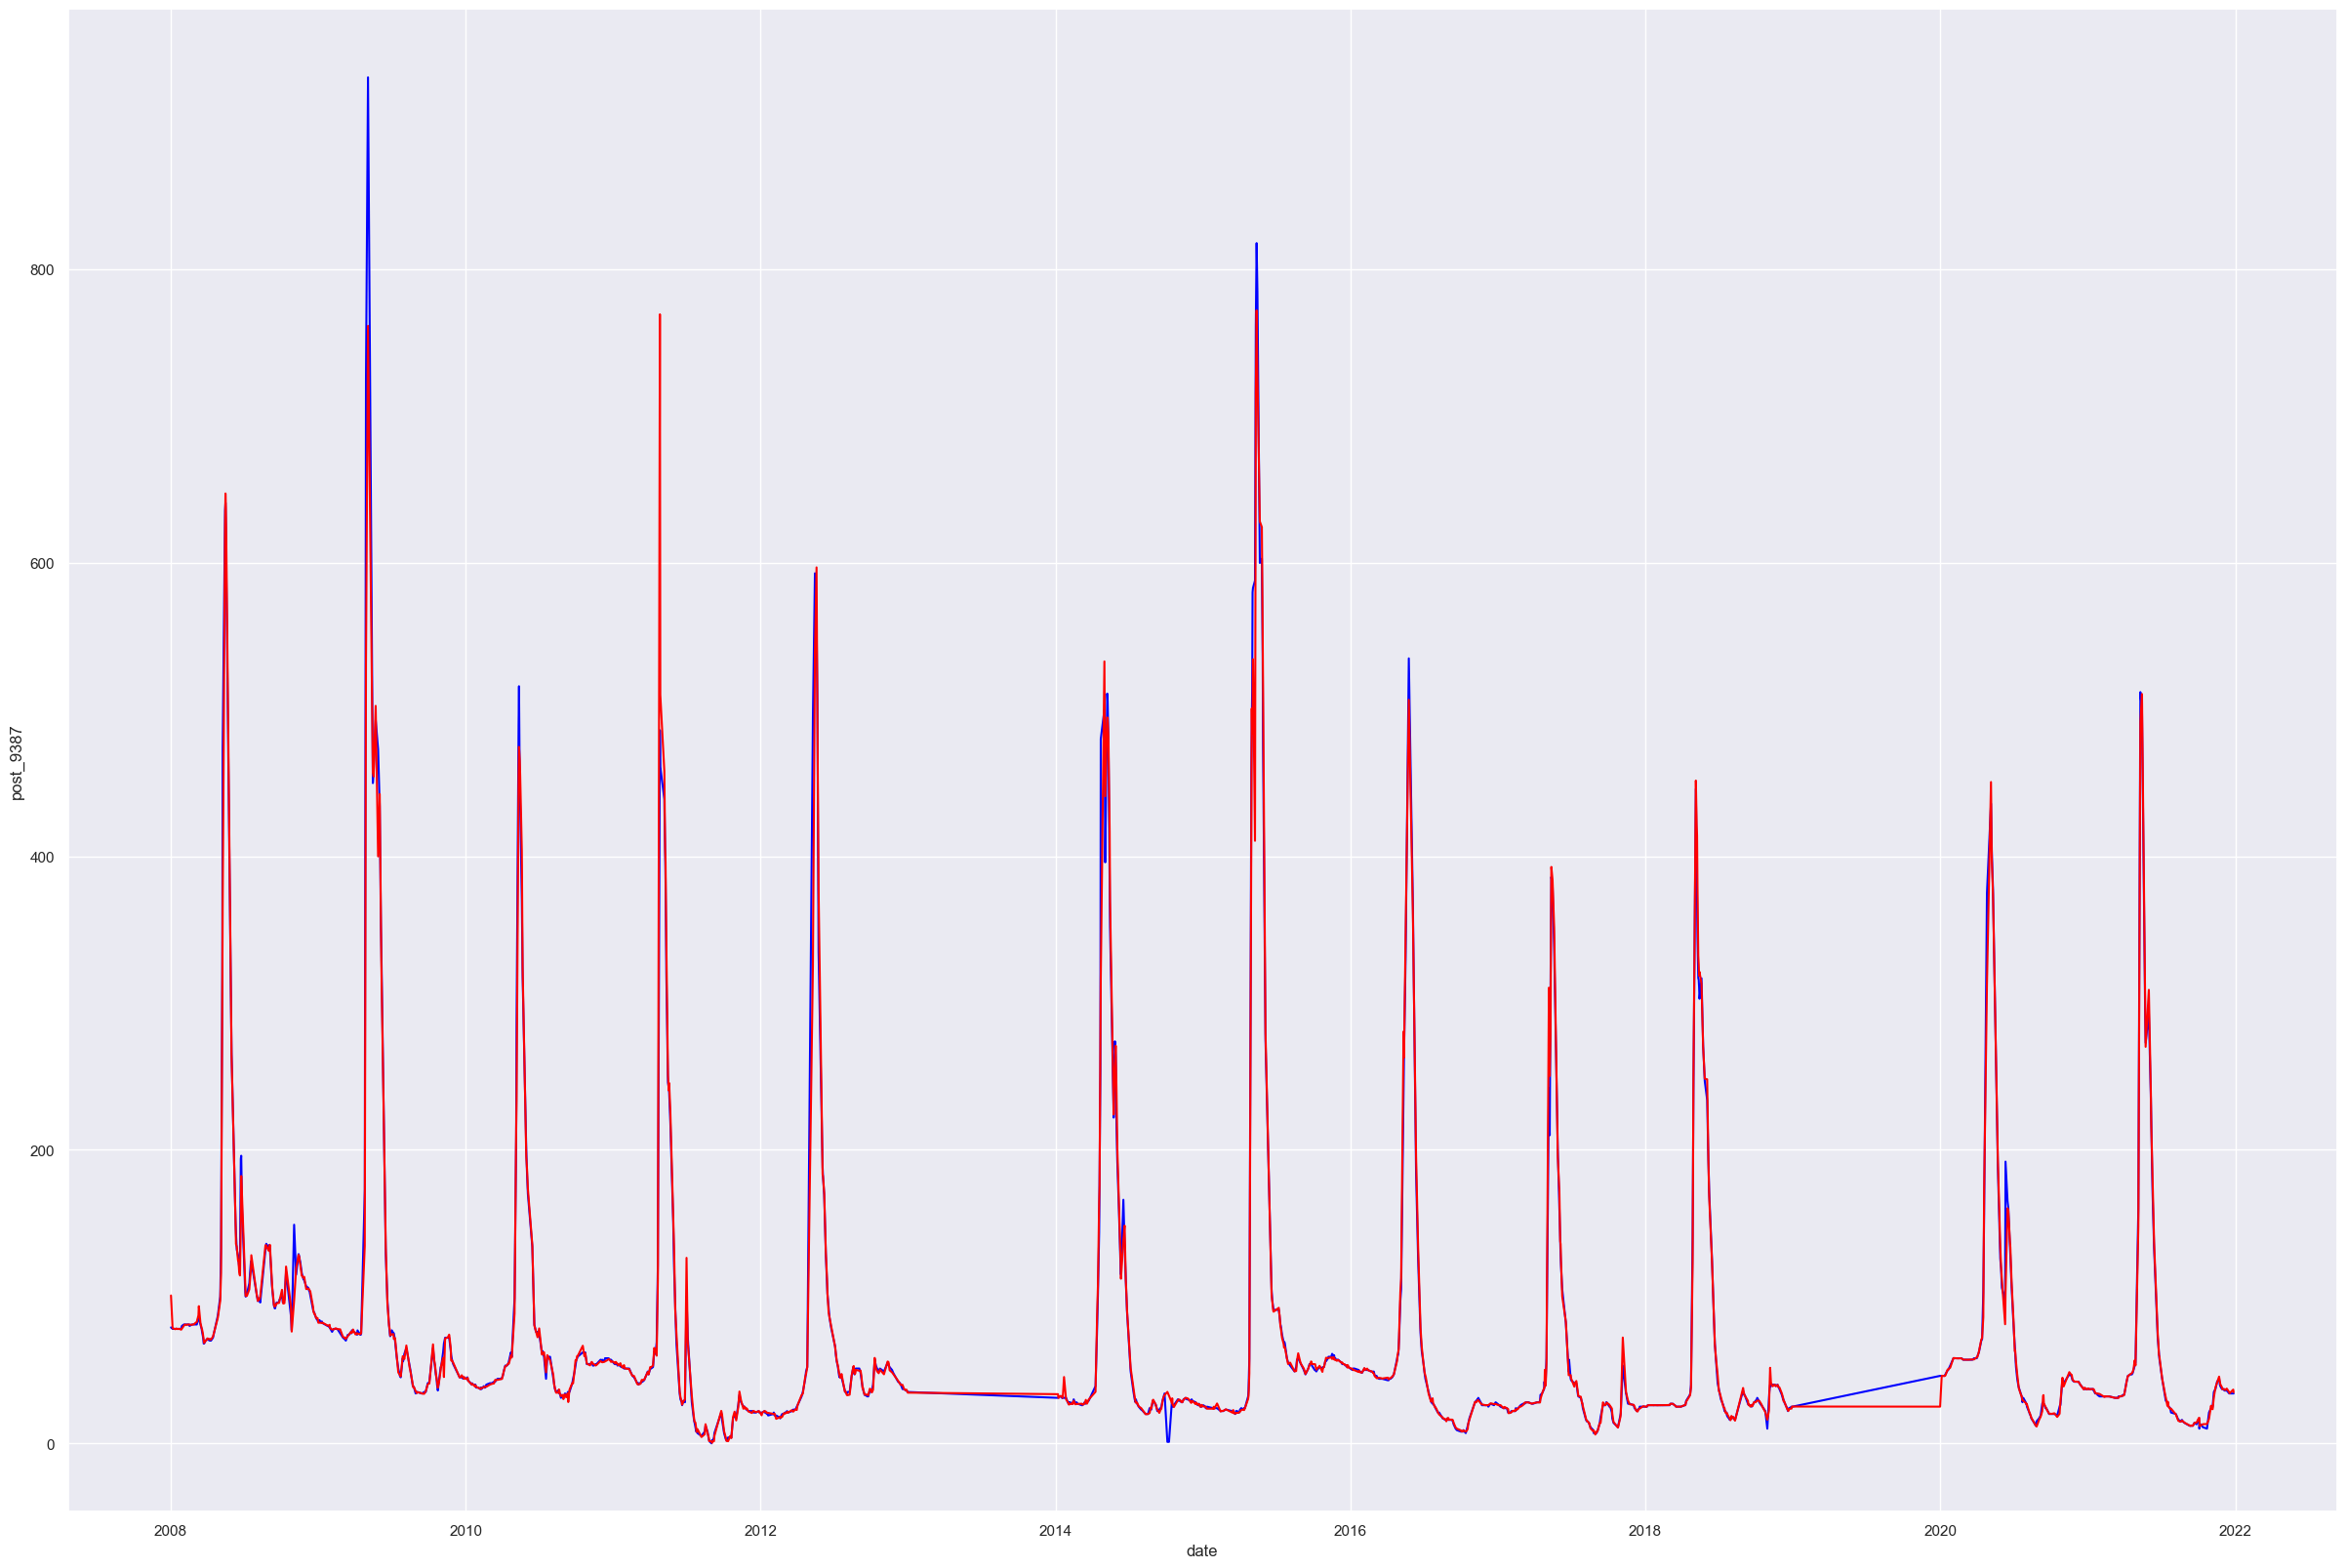

In [204]:
X_test['date'] = X_test_date
plt.figure(figsize=(30,20))
ax = sns.lineplot(x = X_test['date'], y=Y_test, color='blue')
ax = sns.lineplot(x = X_test['date'], y=predictions,color='red')
plt.show()



In [ ]:
#To Do создать окончательный автомат по предсказанию уровня реки!

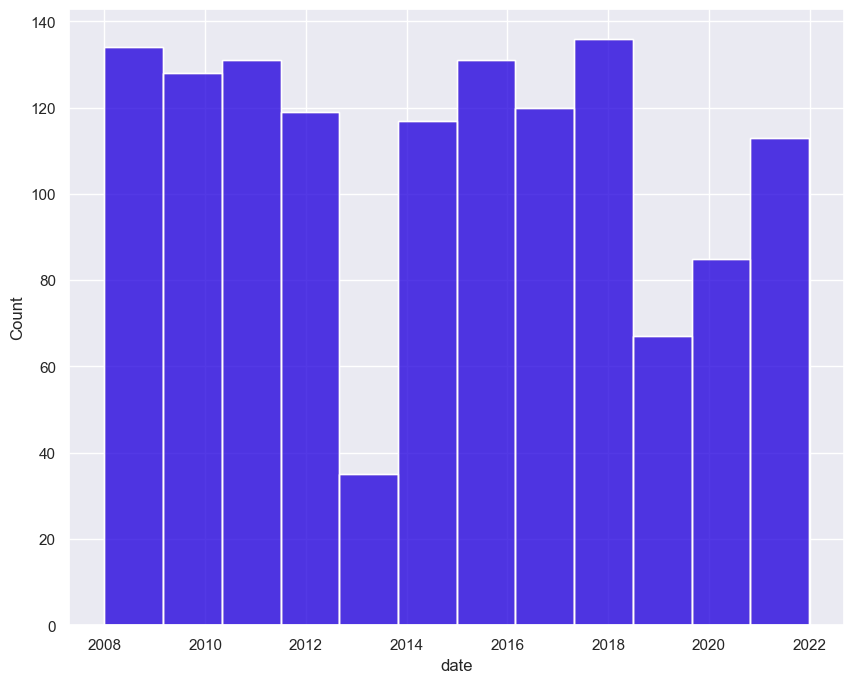